In [1]:
%load_ext autoreload
%autoreload 2
import pickle 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'
from tools.bootstrapTest import bootstrap_traces
from tools.results import data_of_interest
from tools.results import rnai_response_layered
#from tools.results import rnai_response_layered_LW

In [2]:
with open('data/LDS_response_rnai.pickle', 'rb') as f:
    test_result = pickle.load(f)

test_result.keys()

dict_keys(['tau', 'pbx', 'WT', 'WT_1s', 'WT_30s', 'notum', 'wnt', 'slit', 'pc2_30s', 'arrowhead', 'GABA 150mM', 'glu 3mM', 'GABA 300mM', 'glu 17mM', 'vis_30s', 'starve', 'starve_30s', 'synapt', 'eaat1_30s', 'vGlut_30s', 'eaat2_30s', 'nkx_30s', 'gs_30s', 'gluR2_30s', 'tbh_30s', 'eaat12_30s', 'gad_30s', 'gat_30s', 'nkx', 'eaat12', 'tbh', 'vGlut', 'snap25', 'snap25_30s', 'syntaxin_30s', 'synapt1_30s', '7111_30s', 'synapt4_30s', 'rbpms_30s', 'tcf1_30s', 'rbpms100920_30s', 'tbh120120', 'tbh120120_30s', 'gad120120_30s', 'gad120120_5s', 'gad120120', '120820syt1h_30s', '120820syt1t_30s', '120820syt1_30s', '120820syt1t', '120820syt1h', '120820syt1', '120720syt4_30s', '120720syt4h_30s', '120720syt4t_30s', '120720syt4h', '120720syt4t', '120720syt4', 'synaptobrevin_30s', 'synaptobrevinh_30s', 'synaptobrevint_30s', 'synaptobrevin', 'synaptobrevinh', 'synaptobrevint', 'gabra_30s', 'gabra', 'gabrb', 'gabrb_30s', 'gabra+gabrb_30s', 'gabra+gabrb', 'mblk', 'mblk_30s', 'foxq2', 'foxq2_30s', '121720tcf1',

## Compiled Plot
Compiles all valid 5s and 30s datasets for each knockdownlisted in the interest list and runs bootstrap estimates on the complete set of traces

Note: printout lists are all datasets that are compiled for each condition.  Please check that what is being compiled is what you want!

_interest_: a list of terms you want to search the compiled data to include (e.g. a gene name)  

_exclude_: don't include data if it contains a term in this list (e.g. '+' will exclude double knockdowns)  

_n boot_: number of bootstrap samples to draw (use >=1e3 for high-quality)  

_statistic_: what statistic to sample with the bootstrap (default is median)  

_control_rnai_: whether to include control RNAi condition with WT

_drugs_: whether to look in the drug compiled data (not in this publication)

_comparison_ statistical comparison to run for response measurements (right)

['WT_30s', 'cntrl_30s']


100%|██████████| 1000/1000 [00:11<00:00, 89.43it/s]


['nkx_30s']


100%|██████████| 1000/1000 [00:09<00:00, 101.29it/s]


['052621nkx_30s']


  4%|▍         | 43/1000 [00:00<00:02, 429.36it/s]

MARK1


  3%|▎         | 30/1000 [00:00<00:03, 299.13it/s]

True


  3%|▎         | 31/1000 [00:00<00:03, 303.06it/s]

MARK1


100%|██████████| 1000/1000 [00:03<00:00, 303.12it/s]

False
(0, 1.5)


(-1, 10)

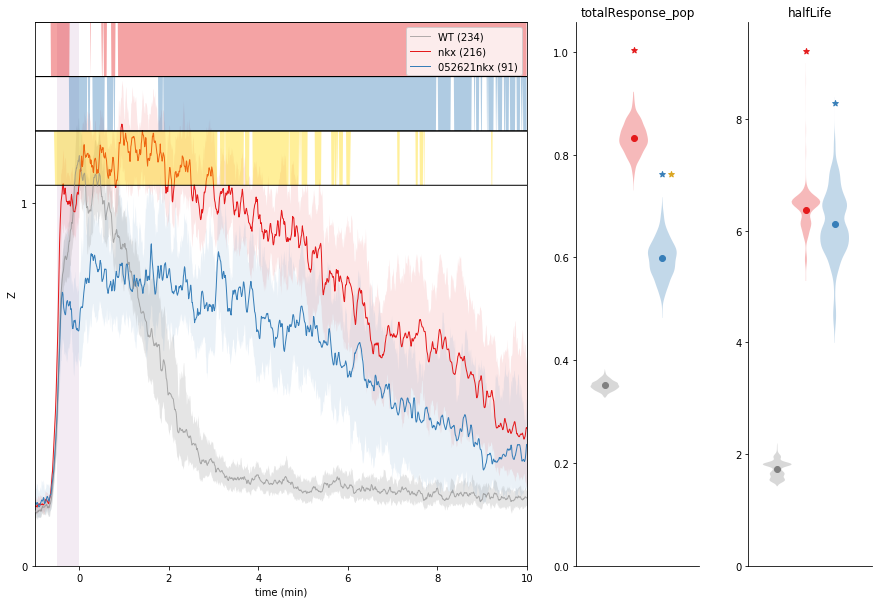

In [28]:
%matplotlib inline

#Can calculate with adaptionTime, halfLife, responseDuration, peakResponse, totalResponse_pop, totalResponse

import numpy as np
from tools.results import rnai_response_layered
from tools.measurements import halfLife
from tools.measurements import totalResponse_pop

n_boot = 1e3
statistic=np.median
comparison = 'diff'
drugs=0

# interest=['eye531', 'eye532','spp1','ppp1','1020hh118','1020hh120']
#interest = ['nkx','pknox','otxa','foxq2','arx','tcf1','soxb2','mblk','pou6f1']
#exclude=['starve','pknox30s','052621nkx']
#interest = ['ampPreEyespot8hpa','ampPostEyespot8hpa','amp1xPostEyespot8hpa','ampMidEyespotPharynx8hpa','WTampPostPharynx']
#interest=['gad','gad+pc2','chat', 'chat+pc2','th', 'th+pc2']



interest=['nkx','052621nkx',]
#interest=['tbh','tbh120120',]
#interest=['gad','100421gad',]#'100421gad','gad120120',
#interest=['tcf1','121720tcf1',] #032621tcf1, '121720tcf1
#interest=['pc2','022421pc2',]

#interest=['pc2', '022421pc2',]

exclude=[]

compile_results=False # makes it only look at the exact values for each element in interest, i.e. separate experiments is false

fig,ax = rnai_response_layered(interest,exclude,n_boot,statistic,drugs=drugs,
                              measure_compare=comparison,
                              pulseTimes=[30],conf_interval=99, stat_testing=1,
                              plot_comparison=False,ylim=((0,1.5)),control_rnai=1,
                              pop_measure=[totalResponse_pop, halfLife],
                              compare_rnai=1,compile_results=compile_results)

ax[0].set_xlim(-1,10)



In [22]:
# fig.savefig('plots/chat+tbh_totalresponse.svg')
fig.savefig('plots/nkx_stats30s.svg')

In [ ]:
fig,ax = rnai_response_layered(interest,exclude,n_boot,statistic,drugs=drugs,
                              measure_compare=comparison,
                              pulseTimes=[5,30],conf_interval=99, stat_testing=1,
                              plot_comparison=False,ylim=((0,1),(0,1.5)),control_rnai=1,
                              pop_measure=[totalResponse_pop, halfLife],
                              compare_rnai=1,compile_results=compile_results)

In [ ]:
fig.savefig('plots/pc2check_trace.svg')

  0%|          | 0/30 [00:00<?, ?it/s]

['022421pc2']


 40%|████      | 12/30 [00:00<00:00, 113.52it/s]

['pc2_30s', '022421pc2_30s']


 17%|█▋        | 5/30 [00:00<00:00, 49.83it/s]

['nkx', '052621nkx']


 30%|███       | 9/30 [00:00<00:00, 82.29it/s]

['nkx_30s', '052621nkx_30s']


  0%|          | 0/30 [00:00<?, ?it/s]

['041423nkx+pc2']


  0%|          | 0/30 [00:00<?, ?it/s]

['040323nkx+pc2_30s']


100%|██████████| 30/30 [00:00<00:00, 358.33it/s]


(0, 1)
(0, 1.5)


(-1, 7)

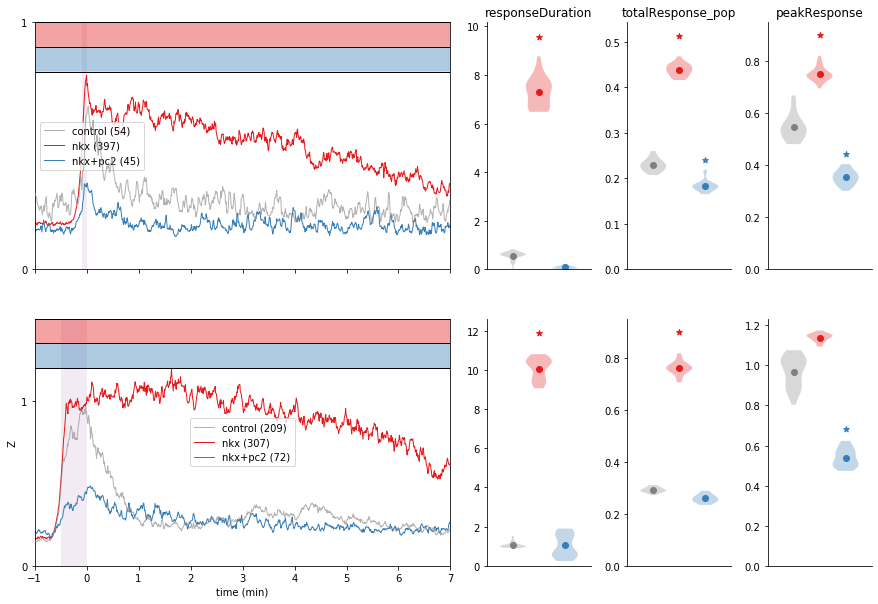

In [6]:
%matplotlib inline
import numpy as np
from tools.results import rnai_response_layered_LW
n_boot = 1e0
statistic=np.median
comparison = 'diff'
#plot_subset
drugs=0
interest=['nkx', 'nkx+pc2',]
exclude=['starve']

fig,ax = rnai_response_layered_LW(interest,exclude,n_boot,statistic,drugs=drugs,
                              measure_compare=comparison,
                              pulseTimes=[5,30],conf_interval=99, stat_testing=1,
                              plot_comparison=False,ylim=((0,1),(0,1.5)),control_rnai=0,pc2_rnai=1)

ax[0].set_xlim(-1,7)


In [ ]:
fig.savefig('plots/neuropeptides_peakTiming.png')

In [7]:
# Use this if you want to look at the available datasets :)
import pickle
name = 'data/LDS_response_rnai.pickle'
with open(name,'rb') as f:
    result = pickle.load(f)
interest = 'pc2'    
for i in result.keys():
    if interest in i: print(i)

pc2_30s
022421pc2_30s
022421pc2_5s
022421pc2
gad+pc2_30s
gad+pc2
122721pc2_11s
122721pc2_60s
pc2_1s
pc2_60s
020422tbh+pc2_30s
020422tbh+pc2
tcf1+pc2_30s
tcf1+pc2
chat+pc2_30s
chat+pc2
070522th+pc2_30s
070522th+pc2
082222pc21F_30s
082222pc21F
040323nkx+pc2_30s
040323nkx+pc2_1s
041423nkx+pc2
041423arx+pc2
041423arx+pc2_30s
